In [ ]:
%reset -f

In [ ]:
import scipy.special as spe
import matplotlib.pyplot as plt
import numpy as np

## Polynomes de Legendre

En plus des bases sinus-cosinus et exponentielle, il existe d'autres bases orthogonales par rapport au produit scalaire usuel. En particulier les polynômes de Legendre sont souvent utilisés en analyse numérique pour faire des intégrations numériques: l'idée est d'approcher la fonction à intégrer par un polynôme, puis de calculer exactement l'intégrale (car il est facile d'extraire la primitive d'un polynôme).


Mais nous verrons qu'il est vraiment plus compliqué d'obtenir une discrétisation parfaite de la base de Legendre.


***Définition:*** Les polynomes de Legendre sont définis sur $[-1,+1]$, par la formule récursive:
\begin{align*}
n P_n(x)&=  (2n-1) x P_{n-1}(x)- (n-1) P_{n-2}(x)\\
P_0&=1\\
P_1&=x
\end{align*}

Ils sont orthogonal pour le produit scalaire usuel:
$$
\mathtt{dot} (f,g) = \int_{-1}^{+1} f(x)g(x) \, dx
$$

### → ♡



In [ ]:
x=np.linspace(-1,1,100)
basis_cont=[np.ones_like(x),x]

for n in range(2, 10):
    basis_cont.append(...
for i in range(len(basis_cont)):
    plt.plot(x,basis_cont[i])

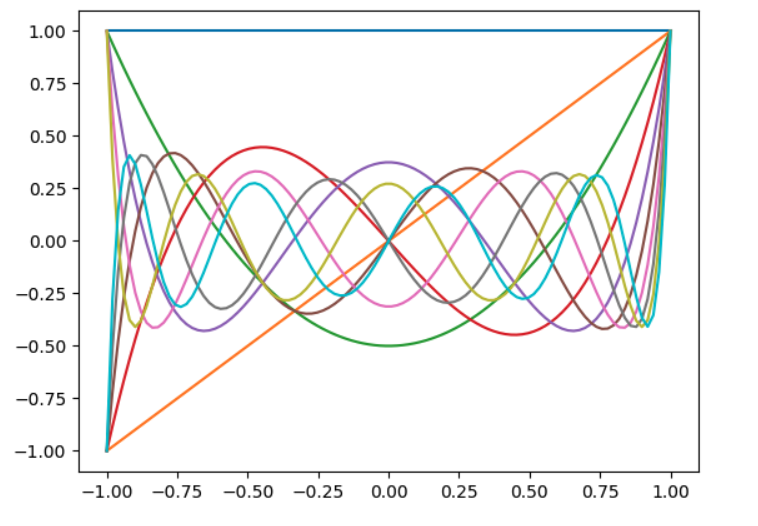

Transformons ces données pour obtenir une matrice numpy:

### → ♡

In [ ]:
basis_matrix= ...
basis_matrix.shape

    (10, 100)

Vérifions l'orthogonalité:

### → ♡♡

In [ ]:
np.set_printoptions(precision=2,suppress=True,linewidth=1000)
plt.plot(sca=basis_matrix@...
print(sca)

       [[100.  ,   0.  ,   1.01,   0.  ,   1.03,   0.  ,   1.07,   0.  ,   1.12,   0.  ],
        [  0.  ,  34.01,   0.  ,   1.02,   0.  ,   1.05,   0.  ,   1.1 ,   0.  ,   1.15],
        [  1.01,   0.  ,  20.82,   0.  ,   1.04,   0.  ,   1.08,   0.  ,   1.13,   0.  ],
        [  0.  ,   1.02,   0.  ,  15.18,   0.  ,   1.07,   0.  ,   1.11,   0.  ,   1.17],
        [  1.03,   0.  ,   1.04,   0.  ,  12.07,   0.  ,   1.1 ,   0.  ,   1.15,   0.  ],
        [  0.  ,   1.05,   0.  ,   1.07,   0.  ,  10.1 ,   0.  ,   1.14,   0.  ,   1.2 ],
        [  1.07,   0.  ,   1.08,   0.  ,   1.1 ,   0.  ,   8.76,   0.  ,   1.19,   0.  ],
        [  0.  ,   1.1 ,   0.  ,   1.11,   0.  ,   1.14,   0.  ,   7.79,   0.  ,   1.24],
        [  1.12,   0.  ,   1.13,   0.  ,   1.15,   0.  ,   1.19,   0.  ,   7.06,   0.  ],
        [  0.  ,   1.15,   0.  ,   1.17,   0.  ,   1.2 ,   0.  ,   1.24,   0.  ,   6.51]])

On voit que la matrice est à diagonale dominante. Mais les termes non-diagonaux ne sont pas négligeables.

Cette situation nous fait pensé aux bases cosinus-sinus sur $[0,T]$ quand on les avait mal discrétisées, càd qu'on avait utilisé comme point de discrétisation:


### → ♡

In [ ]:
np.linspace(0,T,100,enpoint=True)

Alors que la bonne discrétisation pour les sin-cos est:

In [ ]:
 ...


## La bonne discrétisation pour Legendre





On veut maintenant créée une base discrète issue de la discrétisation de ces polynomes. On aimerait que cette base soit parfaitement orthogonale pour un produit scalaire donné.

Pour créer une telle base, il faut utiliser des points de discrétisation spéciaux: les points de Gauss. Ce sont les racines sur $P_{n+1}$ polynomes de legendre. Notons $(x_0,...,x_n)$ ce points.


Considérons la famille de vecteur $V^0,V^1,...$ défini par:
$$
V^k_i=P_k(x_i)
$$
Cette famille est orthonormale pour le produit scalaire discret:
$$
\mathtt{dot_{dis}} (u,v) = \sum_{i} w_i u_i v_i
$$
où $w_i$ sont des poids données.



Nous allons demandé à scipy de nous trouver les points de Gauss $(x_i)$ et les poids $(w_i)$.

In [ ]:
n_point=50
""" The Gauss point, and their associated weights"""
x, w, _ = spe.roots_legendre(n_point, True)
print("discrétisation:",x)

plt.plot(x, w, '.');

In [ ]:
len(x),len(w)

Créons la base discrète. On va la construire en remplissant au fur et à mesure une matrice (donc différement de ce qu'on a fait précédement pour la base `basis_cont`)

### → ♡

In [ ]:
n_poly=19
basis = np.zeros([n_poly,n_point])
basis[0, :] = 1.
basis[1, :] = x
for n in range(2, n_poly):
    basis[n, :] = ...

basis.shape

    (19, 50)

Traçons-les:

### → ♡

In [ ]:
for i in range(n_poly):
    plt.plot(...


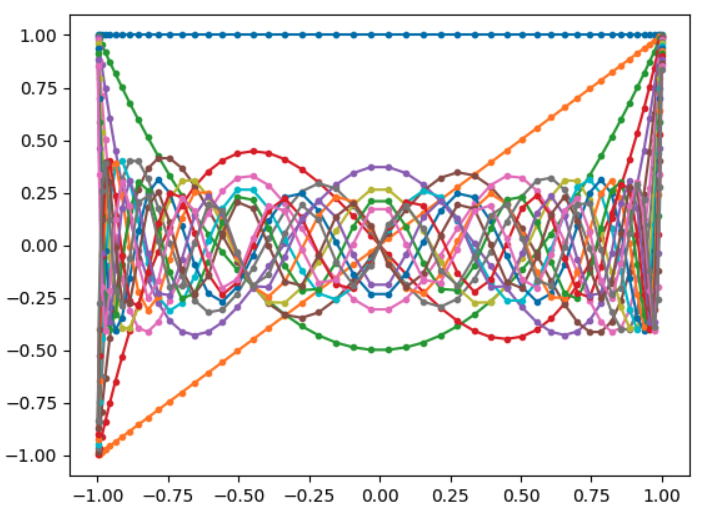

Vérifions que ces vecteur sont orthoganaux pour le produit scalaire pondéré:

### → ♡♡

In [ ]:
""" weights are put on the diagonal of a matrix"""
W=np.diag(w)
sca = basis@...
"""The Legendre family is orthogonal but not orthonormal"""
print(sca)

    [[ 2.    0.   -0.   -0.   -0.   -0.   -0.    0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.    0.   -0.   -0.   -0.   -0.  ]
    [ 0.    0.67 -0.   -0.    0.   -0.    0.   -0.    0.   -0.   -0.   -0.    0.   -0.   -0.   -0.   -0.   -0.    0.   -0.  ]
    [-0.   -0.    0.4   0.   -0.    0.   -0.   -0.   -0.    0.   -0.    0.   -0.   -0.   -0.    0.   -0.   -0.   -0.   -0.  ]
    [-0.   -0.    0.    0.29  0.   -0.    0.   -0.    0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.    0.   -0.  ]
    [-0.   -0.   -0.   -0.    0.22  0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.    0.   -0.    0.   -0.   -0.  ]
    [ 0.   -0.    0.   -0.    0.    0.18  0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.    0.   -0.   -0.   -0.   -0.   -0.  ]
    [-0.   -0.   -0.    0.   -0.   -0.    0.15 -0.   -0.    0.   -0.   -0.   -0.   -0.   -0.    0.   -0.   -0.   -0.    0.  ]
    [ 0.   -0.   -0.   -0.   -0.   -0.   -0.    0.13  0.   -0.   -0.   -0.    0.   -0.    0.   -0.   -0.   -0.   -0.   -0.  ]
    [-0.    0.   -0.    0.   -0.   -0.   -0.   -0.    0.12  0.   -0.    0.   -0.   -0.   -0.   -0.   -0.    0.   -0.   -0.  ]
    [-0.   -0.    0.   -0.    0.   -0.    0.   -0.    0.    0.11  0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.  ]
    [-0.    0.   -0.   -0.   -0.    0.   -0.   -0.   -0.   -0.    0.1   0.   -0.   -0.   -0.   -0.   -0.    0.   -0.   -0.  ]
    [ 0.   -0.    0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.    0.    0.09  0.   -0.   -0.   -0.    0.   -0.    0.   -0.  ]
    [-0.   -0.   -0.    0.   -0.   -0.   -0.   -0.   -0.    0.   -0.    0.    0.08  0.   -0.   -0.   -0.    0.   -0.    0.  ]
    [-0.   -0.   -0.   -0.    0.   -0.    0.   -0.    0.   -0.   -0.   -0.    0.    0.07 -0.   -0.   -0.   -0.   -0.   -0.  ]
    [-0.    0.   -0.    0.   -0.   -0.   -0.   -0.   -0.    0.   -0.   -0.   -0.    0.    0.07 -0.   -0.    0.   -0.   -0.  ]
    [ 0.   -0.   -0.   -0.    0.   -0.    0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.    0.06  0.   -0.    0.   -0.  ]
    [-0.   -0.   -0.   -0.   -0.    0.   -0.    0.   -0.   -0.   -0.   -0.   -0.    0.   -0.    0.    0.06 -0.   -0.   -0.  ]
    [-0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.    0.06 -0.   -0.  ]
    [-0.   -0.   -0.    0.   -0.    0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.    0.    0.05  0.  ]
    [-0.   -0.    0.   -0.    0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.    0.   -0.   -0.   -0.    0.   -0.   -0.    0.05]]

Normalisons cette famille pour obtenir une famille orthonormale:

### → ♡♡

In [ ]:
"""We normalize the family"""
basisNor=np.zeros_like(basis)
for i in range(n_poly):
    basisNor[i,:]=

print(basisNor @ W @ basisNor.T )

    [[ 1. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.]
    [-0.  1. -0. -0. -0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0. -0.  0. -0.]
    [-0. -0.  1. -0. -0. -0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0.]
    [-0. -0.  0.  1. -0. -0.  0. -0. -0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0. -0.]
    [-0. -0. -0. -0.  1. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0. -0. -0. -0.]
    [-0. -0.  0. -0.  0.  1. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.]
    [-0. -0. -0. -0. -0.  0.  1. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0. -0. -0.]
    [ 0. -0.  0. -0.  0. -0.  0.  1.  0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0.]
    [-0. -0. -0. -0. -0. -0. -0. -0.  1. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.]
    [ 0. -0.  0. -0.  0. -0.  0. -0.  0.  1. -0. -0. -0. -0.  0. -0. -0. -0.  0. -0.]
    [-0. -0. -0. -0. -0. -0. -0.  0. -0. -0.  1.  0. -0.  0. -0. -0. -0. -0. -0.  0.]
    [ 0. -0. -0. -0.  0. -0. -0. -0.  0. -0.  0.  1.  0. -0. -0. -0. -0. -0.  0. -0.]
    [-0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.  0.  1. -0. -0.  0. -0. -0. -0. -0.]
    [ 0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  1.  0. -0. -0. -0. -0. -0.]
    [-0. -0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  1. -0. -0. -0. -0. -0.]
    [ 0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0. -0. -0.  0.  1.  0. -0. -0. -0.]
    [-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  1. -0. -0. -0.]
    [-0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  1.  0. -0.]
    [-0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0.  1.  0.]
    [-0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.  0.  1.]]

## Approximation d'une fonction.


Nous allons considérer la fonction $t\to |t|$  que l'on discrétise aux points de Gauss.  Nous allons approximer notre vecteur dans la base que l'on vient de créer.  

### → ♡♡♡

In [ ]:
""" La fonction à approximer (discrétisée) """
y = np.sqrt(np.abs(x))

""" ses coordonnées: """
 y_coor = basisNor @  ...


""" L'approximation est une combinairons linéaire
des éléments de la base:   """
y_approx= y_coor @ basisNor


plt.plot(x,y,'.-',label="y")
plt.plot(x,y_approx,'.-',label="y_approx")
plt.legend();

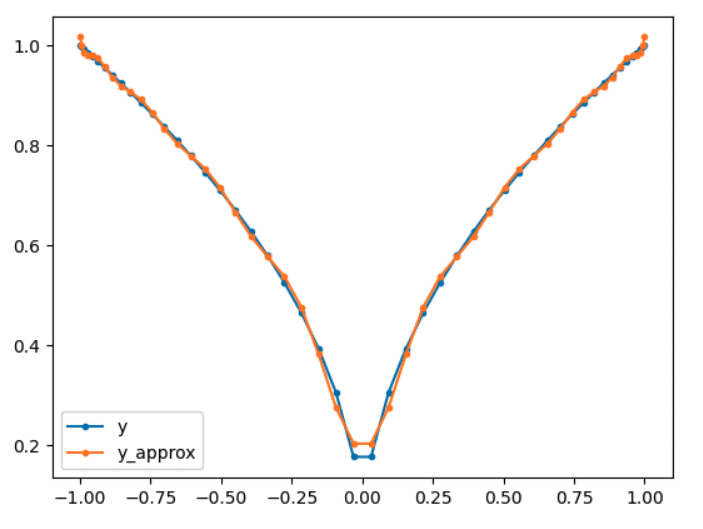

Notons qu'il est normal que le graph de la fonction $t\to|t|$ soit plat en $0$: c'est à cause de la discrétisation.  




### → ♡

Sous quel condition l'approximation est-elle parfaite ? (càd que les points bleus et oranges coincident dans le graph ci-dessus).

Il faudrait ...
